In [23]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *

In [24]:
p_data = "project_data_final.csv"
p_df = pd.read_csv(p_data)
p_df['Date Completed'] = pd.to_datetime(p_df['Date Completed'])
p_df = p_df.drop(columns=['Unnamed: 0'])
p_df.head()


/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Project Number,City,Zip Code,Sector,Electric Utility,Purchase Type,Project Status,Date Application Received,Date Completed,Project Cost,...,education_associates,education_bachelors,education_masters,education_professional,education_doctorate,Date Application Received Int,Date Completed Int,Project Days Int,Completed Year,Completed Month
0,4260-88892,Three Mile Bay,13693,Residential,National Grid,Purchase,Complete,2016-02-01,2016-09-21,29680.00,...,24.0,57.0,17.0,0.0,0.0,1454313600,1474441200,232,2016,9
1,89350,Queens,11434,Residential,Consolidated Edison,Lease,Complete,2017-05-30,2017-07-25,30791.25,...,3576.0,5680.0,2599.0,318.0,83.0,1496127600,1500966000,56,2017,7
2,93198,Bronx,10456,Residential,Consolidated Edison,Lease,Complete,2017-07-19,2017-09-20,13906.00,...,2522.0,3906.0,1054.0,242.0,50.0,1500447600,1505890800,63,2017,9
3,2011-157041-SLPR,Old Field,11733,Residential,PSEG Long Island,Purchase,Complete,2005-10-09,2005-10-09,NaN,...,850.0,2762.0,2489.0,984.0,950.0,1128841200,1128841200,0,2005,10
4,2011-158360-SLPR,Medford,11763,Residential,PSEG Long Island,Purchase,Complete,2009-04-23,2009-04-23,136952.00,...,2091.0,2898.0,1552.0,96.0,125.0,1240470000,1240470000,0,2009,4


In [25]:
#create analysis data frames
df = p_df[['Project Number','Sector','Date Completed','Expected KWh Annual Production', 'income', 'Purchase Type']]

residential_df = df.loc[df['Sector'] == 'Residential']
residential_df = residential_df.reset_index()
residential_df = residential_df.drop(columns=['index'])
residential_df = residential_df.sort_values('Date Completed', ascending=True)

residential_df.head()

,Project Number,Sector,Date Completed,Expected KWh Annual Production,income,Purchase Type
621,2011-156227-SLPR,Residential,2000-12-21,1409,94658.0,Purchase
124,2011-156225-SLPR,Residential,2000-12-21,1409,87327.0,Purchase
775,2011-156228-SLPR,Residential,2001-03-07,5165,24300.0,Purchase
467,2011-156229-SLPR,Residential,2001-03-07,2113,104986.0,Purchase
826,2011-156239-SLPR,Residential,2001-07-02,2582,90833.0,Purchase


In [26]:
# RENAMING DATAFRAME
r_df = residential_df

# RESIDENTIAL PURCHASE DF
r_purchase_df = r_df.loc[r_df['Purchase Type'] == 'Purchase']

# RESIDENTIAL LEASE DF
r_lease_df = r_df.loc[r_df['Purchase Type'] == 'Lease']

# RESIDENTIAL POWER PURCHASE AGREEMENT DF
r_ppa_df = r_df.loc[r_df['Purchase Type'] == 'Power Purchase Agreement']


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


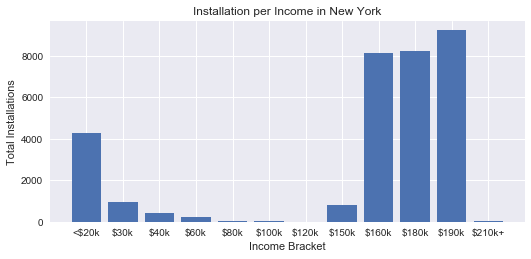

In [27]:
# [RESIDENTIAL - PURCHASE] INCOME DITRIBUTION

plt.style.use('seaborn')


bins = [0, 20000, 40000, 60000,80000, 100000, 120000, 
        140000, 160000, 180000, 200000, 220000 ,240000]
labels = ['<$20k','$30k','$40k','$60k','$80k','$100k',
              '$120k','$150k','$160k', '$180k', '$190k', '$210k+']

test_df = r_purchase_df
test_df['income bins'] = pd.cut(test_df['income'],bins=bins, labels=labels)

rp_projects_per_income_bin = test_df['income bins'].value_counts()
rp_projects_per_income_bin = rp_projects_per_income_bin.to_frame()
rp_projects_per_income_bin = rp_projects_per_income_bin.reset_index()
rp_projects_per_income_bin = rp_projects_per_income_bin.rename(columns={'index':'income bin', 'income bins':'purchase project count'})


x_axis = np.arange(0, len(bins))
plt.figure(figsize=(8.5,3.7))
plt.bar(rp_projects_per_income_bin['income bin'], rp_projects_per_income_bin['purchase project count'])
plt.xticks(x_axis, labels)
plt.xlabel('Income Bracket')
plt.ylabel('Total Installations')
plt.title("Installation per Income in New York")
#plt.savefig("Installation_per_income.png")
plt.show()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


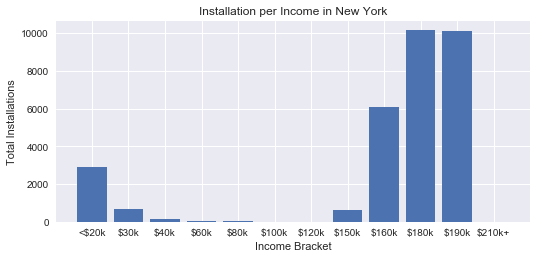

In [28]:
# [RESIDENTIAL - LEASE] INCOME DITRIBUTION

plt.style.use('seaborn')


bins = [0, 20000, 40000, 60000,80000, 100000, 120000, 
        140000, 160000, 180000, 200000, 220000 ,240000]
labels = ['<$20k','$30k','$40k','$60k','$80k','$100k',
              '$120k','$150k','$160k', '$180k', '$190k', '$210k+']

test1_df = r_lease_df
test1_df['income bins'] = pd.cut(test1_df['income'],bins=bins, labels=labels)

rl_projects_per_income_bin = test1_df['income bins'].value_counts()
rl_projects_per_income_bin = rl_projects_per_income_bin.to_frame()
rl_projects_per_income_bin = rl_projects_per_income_bin.reset_index()
rl_projects_per_income_bin = rl_projects_per_income_bin.rename(columns={'index':'income bin', 'income bins':'lease project count'})


x_axis = np.arange(0, len(bins))
plt.figure(figsize=(8.5,3.7))
plt.bar(rl_projects_per_income_bin['income bin'], rl_projects_per_income_bin['lease project count'])
plt.xticks(x_axis, labels)
plt.xlabel('Income Bracket')
plt.ylabel('Total Installations')
plt.title("Installation per Income in New York")
#plt.savefig("Installation_per_income.png")
plt.show()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


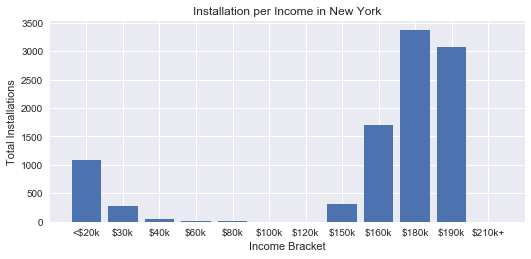

In [76]:
# [RESIDENTIAL - PPA] INCOME DITRIBUTION

plt.style.use('seaborn')


bins = [0, 20000, 40000, 60000,80000, 100000, 120000, 
        140000, 160000, 180000, 200000, 220000 ,240000]
labels = ['<$20k','$30k','$40k','$60k','$80k','$100k',
              '$120k','$150k','$160k', '$180k', '$190k', '$210k+']

test2_df = r_ppa_df
test2_df['income bins'] = pd.cut(test2_df['income'],bins=bins, labels=labels)

rpa_projects_per_income_bin = test2_df['income bins'].value_counts()
rpa_projects_per_income_bin = rpa_projects_per_income_bin.to_frame()
rpa_projects_per_income_bin = rpa_projects_per_income_bin.reset_index()
rpa_projects_per_income_bin = rpa_projects_per_income_bin.rename(columns={'index':'income bin', 'income bins':'ppa project count'})
rpa_projects_per_income_bin

x_axis = np.arange(0, len(bins))
plt.figure(figsize=(8.5,3.7))
plt.bar(rpa_projects_per_income_bin['income bin'], rpa_projects_per_income_bin['ppa project count'])
plt.xticks(x_axis, labels)
plt.xlabel('Income Bracket')
plt.ylabel('Total Installations')
plt.title("Installation per Income in New York")
#plt.savefig("Installation_per_income.png")
plt.show()

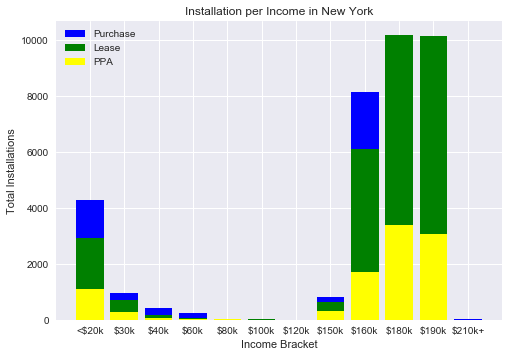

In [31]:
x_axis = np.arange(0, len(bins))
#plt.figure(figsize=(8.5,3.7))
plt.bar(rp_projects_per_income_bin['income bin'], rp_projects_per_income_bin['purchase project count'], color='blue', label='Purchase')
plt.bar(rl_projects_per_income_bin['income bin'], rl_projects_per_income_bin['lease project count'], color='green', label='Lease')
plt.bar(rpa_projects_per_income_bin['income bin'], rpa_projects_per_income_bin['ppa project count'], color='yellow', label='PPA')
plt.xticks(x_axis, labels)
plt.xlabel('Income Bracket')
plt.ylabel('Total Installations')
plt.title("Installation per Income in New York")
plt.legend()
#plt.savefig("Installation_per_income.png")
plt.show()

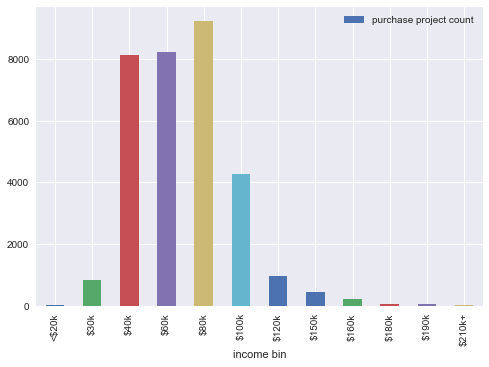

In [81]:
rp_projects_per_income_bin = rp_projects_per_income_bin.reindex([10,5,2,1,0,3,4,6,7,9,8,11])
rp_projects_per_income_bin.plot('income bin', 'purchase project count', kind='bar')

# rl_projects_per_income_bin = rl_projects_per_income_bin.reindex([11, 5 ,2, 0, 1, 3, 4, 6, 7, 8, 9, 10])
# rl_projects_per_income_bin.plot('income bin', 'lease project count', kind='bar')

# rpa_projects_per_income_bin = rpa_projects_per_income_bin.reindex([11, 4, 2, 0, 1, 3, 5, 6, 8, 7, 10, 9])
# rpa_projects_per_income_bin.plot('income bin', 'ppa project count', kind='bar')


/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


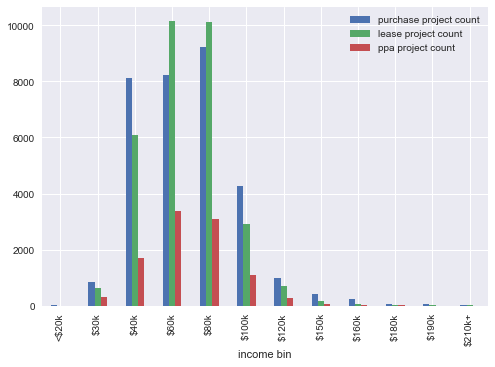

In [80]:
merge1 = rp_projects_per_income_bin.merge(rl_projects_per_income_bin, on='income bin')
merge2 = merge1.merge(rpa_projects_per_income_bin, on='income bin')
#merge2 = merge2.reindex([10, 5, 2, 1, 0, 3, 4, 6, 7, 9, 8, 11])
merge2

merge2.plot('income bin', ['purchase project count', 'lease project count', 'ppa project count'], kind='bar')